In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_demo = pd.read_csv("/kaggle/input/test-file/tested.csv")
df_demo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_demo.isnull().sum() / len(df_demo)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [5]:
df_demo.shape

(418, 12)

In [6]:
df_demo.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

Wrangle the data

In [7]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    #droping the columns with low & high caranility
    df.drop(columns = ["PassengerId", "Name"], inplace = True)
    #drop the columns with more than 50% null values
    df.drop(columns = "Cabin", inplace = True)
    return df

In [8]:
df = wrangle("/kaggle/input/test-file/tested.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q
3,0,3,male,27.0,0,0,315154,8.6625,S
4,1,3,female,22.0,1,1,3101298,12.2875,S


In [9]:
df.isnull().sum() / len(df)

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.002392
Embarked    0.000000
dtype: float64

In [10]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          79
SibSp         7
Parch         8
Ticket      363
Fare        169
Embarked      3
dtype: int64

In [11]:
# for col in df.columns:
#     df[col].plot(kind="box")
#     plt.show()

# No numeric data

In [12]:
corr = df.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [13]:
df["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [14]:
# our target is survived so we are going to check the corelations with survuved individually

corr_sur_with_pclass = df["Survived"].corr(df["Pclass"])

In [15]:
corr_sur_with_age = df["Survived"].corr(df["Age"])

In [16]:
corr_sur_with_SibSp = df["Survived"].corr(df["SibSp"])

In [17]:
corr_sur_with_Parch = df["Survived"].corr(df["Parch"])

In [18]:
corr_sur_with_Fare = df["Survived"].corr(df["Fare"])

In [19]:
print("The corelation b/w survived and Pclass is ", corr_sur_with_pclass)
print("The corelation b/w survived and Age is ", corr_sur_with_age)
print("The corelation b/w survived and SibSp is ", corr_sur_with_SibSp)
print("The corelation b/w survived and Parch is ", corr_sur_with_Parch)
print("The corelation b/w survived and Fare is ", corr_sur_with_Fare)

The corelation b/w survived and Pclass is  -0.10861452091523409
The corelation b/w survived and Age is  -1.2682357097214666e-05
The corelation b/w survived and SibSp is  0.0999433702502642
The corelation b/w survived and Parch is  0.15912011283514063
The corelation b/w survived and Fare is  0.19151374269353372


In [20]:
# from decimal import Decimal

# s = corr_sur_with_age

# b = Decimal(s)


> The corelation cofficents values shows that there is not much difference b/w the target and features

****Pivot Tables****

In [21]:
pclass_pivot = pd.pivot_table(
    df, index = "Pclass", values = "Survived", aggfunc = np.mean
).sort_values(by="Survived")
pclass_pivot

,Survived
Pclass,
2,0.322581
3,0.330275
1,0.467290


In [22]:
df["Age"].nunique()

79

In [23]:
df["Pclass"].nunique()

3

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [25]:
target = "Survived"
y = df[target]
X = df.drop(columns = target)

In [26]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [28]:
from sklearn.pipeline import make_pipeline

In [29]:
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names = True), SimpleImputer(),
    LogisticRegression(max_iter = 1000)
)
model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Sex', 'Ticket', 'Embarked'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [30]:
lr_train_accuracy = model_lr.score(X_train, y_train)
print(lr_train_accuracy)

1.0


In [31]:
lr_val_accuracy = model_lr.score(X_val, y_val)
print(lr_val_accuracy)

1.0


In [32]:
features = model_lr.named_steps["onehotencoder"].get_feature_names()
features[:10]

['Pclass',
 'Sex_male',
 'Sex_female',
 'Age',
 'SibSp',
 'Parch',
 'Ticket_244360',
 'Ticket_C.A. 31029',
 'Ticket_240261',
 'Ticket_21228']

In [33]:
importances = model_lr.named_steps["logisticregression"].coef_[0]
importances[:5]

array([-9.93840981e-02, -3.67683970e+00,  3.67681142e+00, -2.72190466e-03,
        6.30680954e-02])

In [34]:
features = model_lr.named_steps["onehotencoder"].get_feature_names()
importances = model_lr.named_steps["logisticregression"].coef_[0]
feat_imp = pd.Series(np.exp(importances), index=features).sort_values()
feat_imp.head()

Sex_male         0.025303
Embarked_S       0.865837
Pclass           0.905395
Embarked_C       0.916162
Ticket_347077    0.938440
dtype: float64

****DecisionTreeClassifier****

In [35]:
model_dtc = make_pipeline(
    OrdinalEncoder(), SimpleImputer(),
    DecisionTreeClassifier(max_depth = 6, random_state=42)
)
model_dtc.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Sex', 'Ticket', 'Embarked'],
                                mapping=[{'col': 'Sex', 'data_type': dtype('O'),
                                          'mapping': male      1
female    2
NaN      -2
dtype: int64},
                                         {'col': 'Ticket',
                                          'data_type': dtype('O'),
                                          'mapping': 244360          1
C.A. 31029      2
240261          3
21228           4
28004           5
             ... 
349211        288
330920        289
248726        290
365235        291
NaN            -2
Length: 292, dtype: int64},
                                         {'col': 'Embarked',
                                          'data_type': dtype('O'),
                                          'mapping': S      1
Q      2
C      3
NaN   -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('de

In [36]:
acc_train = model_dtc.score(X_train, y_train)
print(acc_train)

1.0


In [37]:
acc_val = model_dtc.score(X_val, y_val)
print(acc_val)

1.0


In [38]:
tree_depth = model_dtc.named_steps["decisiontreeclassifier"].get_depth()
print(tree_depth)

1


 ****Reduce some of unnecessary features****
> Just keep necessary features that are higher corelated>  

In [39]:
corr = df.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [40]:
target1 = "Survived"
features1 = ["Pclass", "SibSp", "Parch", "Fare"]
y1 = df[target1]
X1 = df[features1]

In [41]:
X1.head()

,Pclass,SibSp,Parch,Fare
0,3,0,0,7.8292
1,3,1,0,7.0000
2,2,0,0,9.6875
3,3,0,0,8.6625
4,3,1,1,12.2875


In [42]:
print(X1.shape)
print(y1.shape)

(418, 4)
(418,)


In [43]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(
    X1, y1, test_size = 0.2, random_state = 42
)

In [44]:
model_lr1 = make_pipeline(
    OneHotEncoder(use_cat_names = True), SimpleImputer(),
    #SimpleImputer(),
    LogisticRegression(max_iter = 1000)
)
model_lr1.fit(X_train1, y_train1)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [45]:
lr_train_accuracy1 = model_lr1.score(X_train1, y_train1)
print(lr_train_accuracy1)

0.6467065868263473


In [46]:
lr_val_accuracy1 = model_lr1.score(X_val1, y_val1)
print(lr_val_accuracy1)

0.6190476190476191


In [47]:
features1 = model_lr1.named_steps["onehotencoder"].get_feature_names()
#features1 = model_lr1.get_feature_names()
features1[:10]

['Pclass', 'SibSp', 'Parch', 'Fare']

In [48]:
importances1 = model_lr1.named_steps["logisticregression"].coef_[0]
importances1[:5]

array([-0.15804764,  0.10642314,  0.14229042,  0.00495701])

In [49]:
features1 = model_lr1.named_steps["onehotencoder"].get_feature_names()
importances1 = model_lr1.named_steps["logisticregression"].coef_[0]
feat_imp1 = pd.Series(np.exp(importances1), index=features1).sort_values()
feat_imp1.head()

Pclass    0.853809
Fare      1.004969
SibSp     1.112292
Parch     1.152911
dtype: float64

In [50]:
model_dtc1 = make_pipeline(
    OrdinalEncoder(), SimpleImputer(),
    DecisionTreeClassifier(max_depth = 6, random_state=42)
)
model_dtc1.fit(X_train1, y_train1)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [51]:
acc_train1 = model_dtc1.score(X_train1, y_train1)
print(acc_train1)

0.7634730538922155


In [52]:
acc_val1 = model_dtc1.score(X_val1, y_val1)
print(acc_val1)

0.6309523809523809


In [53]:
tree_depth1 = model_dtc1.named_steps["decisiontreeclassifier"].get_depth()
print(tree_depth1)

6


In [54]:
X1.isnull().sum() / len(X1)

Pclass    0.000000
SibSp     0.000000
Parch     0.000000
Fare      0.002392
dtype: float64

In [55]:
depth_hyperparameters = range(1,7)

In [56]:
training_acc = []
validation_acc = []

for i in depth_hyperparameters:
    #Create model with max_depth of i
    test_model = make_pipeline(
        OrdinalEncoder(), SimpleImputer(),
        DecisionTreeClassifier(max_depth = i, random_state=42)
    )
    test_model.fit(X_train1, y_train1)
    training_acc.append(test_model.score(X_train1, y_train1))
    validation_acc.append(test_model.score(X_val1, y_val1))
    
print("Training Accuracy Score : ", training_acc[:5])
print("Validation Accuracy Score : ", validation_acc[:5])

Training Accuracy Score :  [0.6467065868263473, 0.6616766467065869, 0.6796407185628742, 0.6976047904191617, 0.7335329341317365]
Validation Accuracy Score :  [0.5952380952380952, 0.5952380952380952, 0.6666666666666666, 0.6547619047619048, 0.6428571428571429]


Text(0, 0.5, 'Accuracy score')

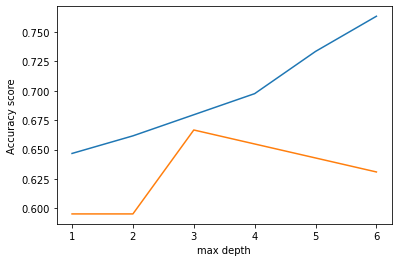

In [57]:
 #plot depth hyperparameters and training accuracy
plt.plot(depth_hyperparameters, training_acc, label = "training")
plt.plot(depth_hyperparameters, validation_acc, label = "validation")

plt.xlabel("max depth")
plt.ylabel("Accuracy score")


In [58]:
#test_acc = model_dtc1.score(X_test1, y_test1)

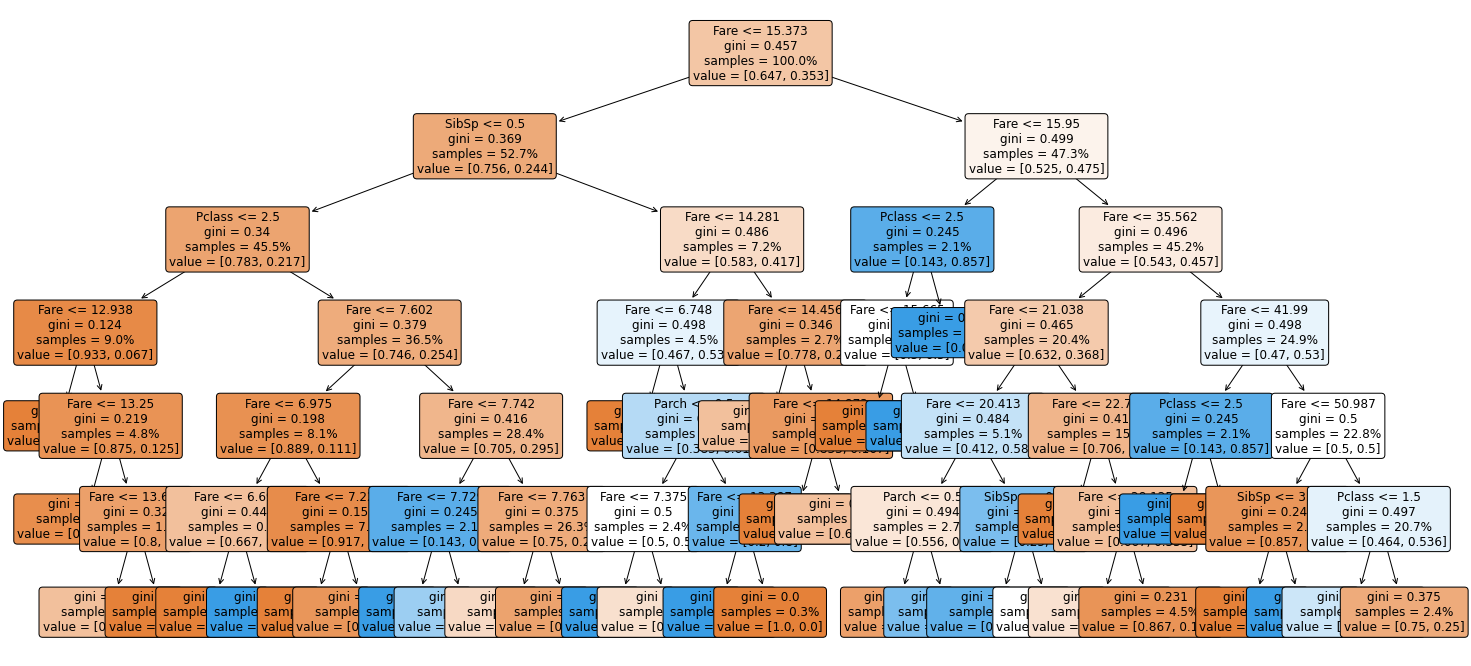

In [59]:
fig, ax = plt.subplots(figsize=(25,12))

plot_tree(
    decision_tree = model_dtc1.named_steps["decisiontreeclassifier"],
    feature_names = X_train1.columns,
    filled = True,
    rounded = True,
    proportion = True,
    max_depth = 6,
    fontsize=12,
    ax=ax
    
);


In [60]:
feautures = X_train1.columns
importances = model_dtc1.named_steps["decisiontreeclassifier"].feature_importances_
print("features", features[:3])
print("importances", importances[:3])

features ['Pclass', 'Sex_male', 'Sex_female']
importances [0.11225614 0.07409803 0.03803115]


In [61]:
#feat_imp = pd.Series(importances, index=features).sort_values()

In [62]:
feat_imp.head()

Sex_male         0.025303
Embarked_S       0.865837
Pclass           0.905395
Embarked_C       0.916162
Ticket_347077    0.938440
dtype: float64

<AxesSubplot:>

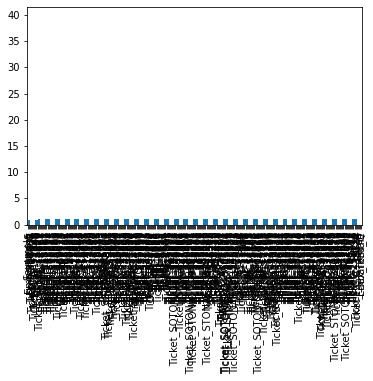

In [63]:
feat_imp.plot(kind="bar")